In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

#Read Data
df_cases = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
df_deaths = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

#Drop unecessary columns
df_cases.drop(["UID", "iso2", "iso3", "code3", "FIPS", "Country_Region", "Lat", "Long_"].copy(),axis=1, inplace=True)
df_deaths.drop(["UID", "iso2", "iso3", "code3", "FIPS", "Country_Region", "Lat", "Long_"].copy(),axis=1, inplace=True)

#Rename columns to be more user friendly
df_cases.rename(columns={"Admin2": "county", "Province_State": "state", "Combined_Key": "county_state"}, inplace=True)
df_deaths.rename(columns={"Admin2": "county", "Province_State": "state", "Combined_Key": "county_state"}, inplace=True)

#Melt dataframes to turn them from wide to narrow
df_cases_melted = pd.melt(df_cases, id_vars=["county","state","county_state"],
                         var_name="dates",
                         value_name="cases")
df_deaths_melted = pd.melt(df_deaths, id_vars=["county","state","county_state","Population"],
                         var_name="dates",
                         value_name="deaths")

#Merge the two melted dataframes
df_merged = pd.merge(df_cases_melted, df_deaths_melted,
                    how="left", on=["county","state","county_state","dates"])

#Change date to_datetime type
df_merged["dates"] = pd.to_datetime(df_merged['dates'])

#Create length of pandemix
df_merged["us_outbreak"] = df_merged["dates"] - df_merged["dates"].min()

#Groupby both cases and deaths
df_c = df_merged.groupby(["state", "dates"], as_index=False)["cases"].sum()
df_d = df_merged.groupby(["state", "dates"], as_index=False)["deaths"].sum()


#Increase or Decrease function
def inc_dec(pre, cur):
    if pre > cur:
        return "decreased"
    else: return "increased"

#Output function to clean up body
def graph_output(w,x,y,z):
    print(f'The 15-day average of new reported {w} is {x}, ranging between {y} and {z}.')


def covid():
    #Ask for name
    name = input("Hello. Please enter your name: ")
    
    #Length of outbreak in USA
    print(f'\nIt has been {df_merged["us_outbreak"].max().days} days since the US outbreak of COVID-19. For which state would you like to view COVID-19 information?')
    
    #Ask for state
    states = []
    for x in df_merged.state:
        states.append(x)
    
    while True:
        choice = input("\tEnter State: ")
        if choice in states:
            state = choice
            break
        else:
            print("Error state not found. Please Choose a valid state.")
        
    
    #Subset dataframe to use input for state
    df_state_c = df_c[df_c["state"] == state].copy()
    df_state_c["new_cases"] = df_state_c["cases"].diff()
    
    df_state_d = df_d[df_d["state"] == state].copy()
    df_state_d["new_deaths"] = df_state_d["deaths"].diff()
    
    print(f'Okay, {name}. Here\'s the information for {state}:\n')
          
    #Provide information on new deaths and new cases
    print(f'Based on the last reported date: {df_merged["dates"].iloc[-1].strftime("%m/%d/%y")}, the number of new COVID-19 cases in {state} is {int(df_state_c.new_cases.iloc[-1])}.')
    print(f'The number of new deaths is {int(df_state_d.new_deaths.iloc[-1])}.\n')
    
    #Use increase or decrease function to show change 
    print(f'The number of cases {inc_dec(df_state_c.new_cases.iloc[-2],df_state_c.new_cases.iloc[-1])} from the previous day count of {int(df_state_c.new_cases.iloc[-2])}.')
    print(f'The number of deaths {inc_dec(df_state_d.new_deaths.iloc[-2],df_state_d.new_deaths.iloc[-1])} from the previous day count of {int(df_state_d.new_deaths.iloc[-2])}.\n')
    
    #Total number of cases/deaths
    print(f'The total number of COVID-19 cases in {state} is {df_state_c.cases.iloc[-1]} and the total number of reported deaths is {df_state_d.deaths.iloc[-1]}.\n')
    
    #Ask for what should be displayed
    print(f'{name}, please select which data visualization to view for {state}:')
    print("\tEnter 1 to view the 15-day trend for new reported cases.\n\tEnter 2 to view the 15-day trend for new reported deaths.")
    
    while True:
        visuals = [1,2]
        selection = int(input("Enter number: "))
        if selection in visuals:
            visual = selection
            break
        else:
            print("You have entered an invalid number.\n\tEnter 1 to view the 15-day trend for new reported cases.\n\tEnter 2 to view the 15-day trend for new reported deaths.")
    if visual == 1:
        plt.figure(figsize=(10,8))
        plt.bar(df_state_c.dates.iloc[-15:], df_state_c.new_cases.iloc[-15:])
        plt.title(f'{state} COVID-19 Cases')
        plt.xlabel("Date")
        plt.ylabel("Count")
        plt.xticks(df_state_c.dates.iloc[-15:], rotation=90)
        plt.show()
        average = round(df_state_c.new_cases.iloc[-15:].mean())
        minimum = round(df_state_c.new_cases.iloc[-15:].min())
        maximum = round(df_state_c.new_cases.iloc[-15:].max())
        c_or_d = "cases"
    elif visual == 2:
        plt.figure(figsize=(10,8))
        plt.bar(df_state_d.dates.iloc[-15:], df_state_d.new_deaths.iloc[-15:])
        plt.title(f'{state} COVID-19 Deaths')
        plt.xlabel("Date")
        plt.ylabel("Count")
        plt.xticks(df_state_d.dates.iloc[-15:], rotation=90)
        plt.show()
        average = round(df_state_d.new_deaths.iloc[-15:].mean())
        minimum = round(df_state_d.new_deaths.iloc[-15:].min())
        maximum = round(df_state_d.new_deaths.iloc[-15:].max())
        c_or_d = "deaths"
    else: print("You have entered an invalid number.")
    graph_output(c_or_d,average,minimum,maximum)
    
    

Hello. Please enter your name: Eissa

It has been 317 days since the US outbreak of COVID-19. For which state would you like to view COVID-19 information?
	Enter State: Verginia
Error state not found. Please Choose a valid state.
	Enter State: Virginia
Okay, Eissa. Here's the information for Virginia:

Based on the last reported date: 12/04/20, the number of new COVID-19 cases in Virginia is 2877.
The number of new deaths is 13.

The number of cases increased from the previous day count of 2023.
The number of deaths decreased from the previous day count of 34.

The total number of COVID-19 cases in Virginia is 247380 and the total number of reported deaths is 4160.

Eissa, please select which data visualization to view for Virginia:
	Enter 1 to view the 15-day trend for new reported cases.
	Enter 2 to view the 15-day trend for new reported deaths.
Enter number: 3
You have entered an invalid number.
	Enter 1 to view the 15-day trend for new reported cases.
	Enter 2 to view the 15-day tr

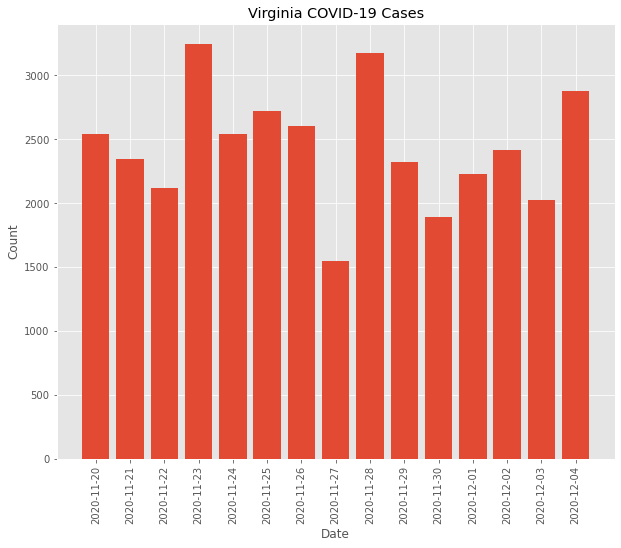

The 15-day average of new reported cases is 2440, ranging between 1544 and 3242.


In [2]:
covid()

Hello. Please enter your name: Eissa

It has been 317 days since the US outbreak of COVID-19. For which state would you like to view COVID-19 information?
	Enter State: Iowa
Okay, Eissa. Here's the information for Iowa:

Based on the last reported date: 12/04/20, the number of new COVID-19 cases in Iowa is 2807.
The number of new deaths is 62.

The number of cases increased from the previous day count of 2565.
The number of deaths decreased from the previous day count of 85.

The total number of COVID-19 cases in Iowa is 241531 and the total number of reported deaths is 2665.

Eissa, please select which data visualization to view for Iowa:
	Enter 1 to view the 15-day trend for new reported cases.
	Enter 2 to view the 15-day trend for new reported deaths.
Enter number: 2


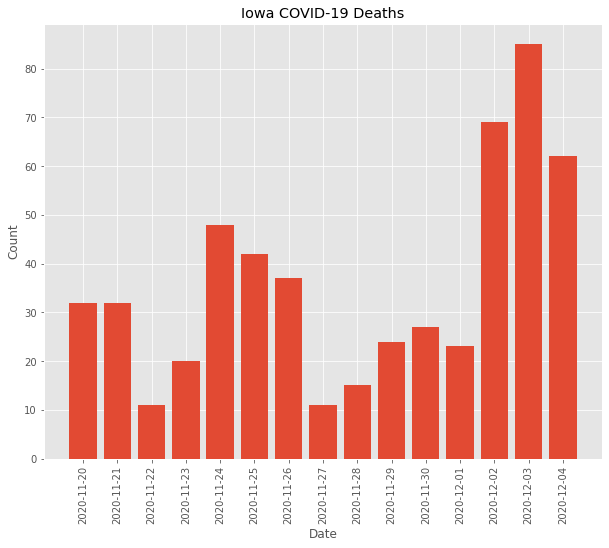

The 15-day average of new reported deaths is 36, ranging between 11 and 85.


In [3]:
covid()